In [45]:

import pandas as pd
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame

# Data

In [46]:
df_enc = pd.read_csv('data\encounter-events.csv')
df_enc.head()

,fishing_vessel_mmsi,transshipment_vessel_mmsi,start_time,end_time,mean_latitude,mean_longitude,duration_hr,median_distance_km,median_speed_knots
0,416565000,354240000,2016-11-18T14:30:00Z,2016-11-19T01:50:00Z,-17.039085,-79.063725,11.333333,0.038188,0.585402
1,412679190,354240000,2016-12-11T14:50:00Z,2016-12-11T19:50:00Z,-20.269608,-79.244953,5.000000,0.020033,0.575663
2,440863000,354240000,2017-06-13T12:50:00Z,2017-06-15T01:20:00Z,-62.640767,-60.690240,36.500000,0.054992,0.019775
3,416563000,354240000,2016-11-15T11:30:00Z,2016-11-16T04:00:00Z,-17.046586,-79.061923,16.500000,0.036427,1.023917
4,441309000,354240000,2017-05-19T00:40:00Z,2017-05-19T20:50:00Z,-46.627878,-60.554922,20.166667,0.034053,0.544031


In [47]:
df_loit = pd.read_csv('data\loitering-events.csv')
df_loit.head()

,transshipment_mmsi,starting_latitude,starting_longitude,ending_latitude,ending_longitude,starting_timestamp,ending_timestamp,median_speed_knots,total_event_duration
0,256064000,12.793800,-69.503235,12.727950,-69.739120,2017-09-06T02:11:32Z,2017-09-06T15:44:15Z,1.091065,13.915556
1,256064000,25.405013,-56.302800,25.393350,-56.488250,2017-07-22T13:19:49Z,2017-07-22T23:59:17Z,1.548335,10.897639
2,256064000,10.693413,-78.512800,10.484500,-78.884300,2017-11-29T14:48:51Z,2017-11-30T07:43:36Z,1.503456,18.001389
3,256064000,11.858933,-75.553383,12.007627,-75.535627,2017-09-07T23:39:03Z,2017-09-08T14:59:26Z,0.650355,16.193611
4,256064000,45.938747,-23.796960,45.976960,-23.449387,2017-08-17T23:18:21Z,2017-08-18T17:56:30Z,1.009874,19.748333


In [48]:
df_ves = pd.read_csv('data/transshipment-vessels.csv') #For some reason this exact relative path causes issues when using the "/" character under windows, no issues under linux tho..... 

df_ves.head()

,mmsi,shipname,callsign,flag,imo,first_timestamp,last_timestamp
0,306117000.0,SIERRALAUREL,PJBQ,ANT,9163403.0,2018-03-29T08:34:21Z,2018-06-30T17:08:41Z
1,306873000.0,SIERRALEYRE,PJJZ,ANT,9135822.0,2012-01-01T01:06:00Z,2012-06-26T08:58:28Z
2,309681.0,GREENBRAZIL,C6WH6,BHS,9045792.0,2018-06-29T10:34:00Z,2018-06-30T23:47:40Z
3,308735000.0,NOVA BRETAGNE,C6JI7,BHS,9000364.0,2012-01-01T00:39:08Z,2013-09-12T10:03:48Z
4,311000682.0,SIERRA LARA,C6DI3,BHS,9120205.0,2017-07-03T10:28:05Z,2018-06-30T23:35:36Z


# Maps

## Encounter Events

<AxesSubplot:>

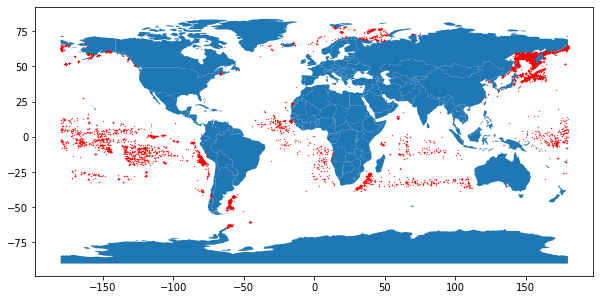

In [49]:
geometry = [Point(xy) for xy in zip(df_enc['mean_longitude'], df_enc['mean_latitude'])]
gdf_enc = GeoDataFrame(df_enc.copy(), geometry=geometry)   #Copy to avoid creating a shallow copy


world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
gdf_enc.plot(ax=world.plot(figsize=(10, 6)), marker='o', color='red', markersize=00.1)

## Loitering Events

<AxesSubplot:>

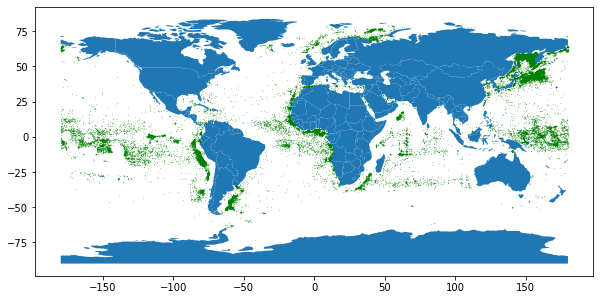

In [50]:
geometry = [Point(xy) for xy in zip(df_loit['starting_longitude'], df_loit['starting_latitude'])]
gdf_loit = GeoDataFrame(df_loit.copy(), geometry=geometry)   #Copy to avoid creating a shallow copy


world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
gdf_loit.plot(ax=world.plot(figsize=(10, 6)), marker='o', color='green', markersize=0.01)

# Data Quality 

## Duplicates:

In [51]:
print("Encounter Events: " +str(df_enc.duplicated().sum()))
print("Loitering Events: " +str(df_loit.duplicated().sum()))
print("Vessels: " +str(df_ves.duplicated().sum()))

Encounter Events: 98
Loitering Events: 184
Vessels: 0


We have multiple duplicates in both datasets, the ships' registry is not affected

## Data Types

In [52]:
df_enc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11681 entries, 0 to 11680
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   fishing_vessel_mmsi        11681 non-null  int64  
 1   transshipment_vessel_mmsi  11681 non-null  int64  
 2   start_time                 11681 non-null  object 
 3   end_time                   11681 non-null  object 
 4   mean_latitude              11681 non-null  float64
 5   mean_longitude             11681 non-null  float64
 6   duration_hr                11681 non-null  float64
 7   median_distance_km         11681 non-null  float64
 8   median_speed_knots         11681 non-null  float64
dtypes: float64(5), int64(2), object(2)
memory usage: 821.4+ KB


In [53]:
df_loit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46569 entries, 0 to 46568
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   transshipment_mmsi    46569 non-null  int64  
 1   starting_latitude     46569 non-null  float64
 2   starting_longitude    46569 non-null  float64
 3   ending_latitude       46569 non-null  float64
 4   ending_longitude      46569 non-null  float64
 5   starting_timestamp    46569 non-null  object 
 6   ending_timestamp      46569 non-null  object 
 7   median_speed_knots    46569 non-null  float64
 8   total_event_duration  46569 non-null  float64
dtypes: float64(6), int64(1), object(2)
memory usage: 3.2+ MB


Of note is that while the two datasets feature the same number of dimensions, the features are inherently different:
The second dataset especially features starting and ending timestamps and locations instead of means and needs to be adapted for direct comparission

In [54]:
df_ves.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1124 entries, 0 to 1123
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   mmsi             1070 non-null   float64
 1   shipname         1123 non-null   object 
 2   callsign         1106 non-null   object 
 3   flag             1124 non-null   object 
 4   imo              1074 non-null   float64
 5   first_timestamp  1070 non-null   object 
 6   last_timestamp   1070 non-null   object 
dtypes: float64(2), object(5)
memory usage: 61.6+ KB


And here we encounter our first real issues: NA values in all features that need to be further investigated
However, if we are lucky, these issues do not affect ships in the two main datasets, especially because these must feature a mmsi value

In [55]:
df_ves.isnull().sum(axis = 0)

mmsi               54
shipname            1
callsign           18
flag                0
imo                50
first_timestamp    54
last_timestamp     54
dtype: int64